# Project 1

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


##### 1. What does the data describe?

The verbal and math scores for each state as well as the rate. However, I am not sure what the rate is rating

##### 2. Does the data look complete? Are there any obvious issues with the observations?

There are no missing observations, but there is an "All" entry in the State column


##### 3. Create a data dictionary for the dataset.

##### Data Source: 
    GA
##### Data Describes: 
    SAT scores
##### Variables Names and Types: 
    State (string), Rate (String), Verbal (String), Math (String)
##### Notes:
    1. Missing Observations: None
    2. One row has entry as ALL

## Step 2: Load the data.

##### 4. Load the data into a list of lists

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
################################

sat_score_data = '../assets/sat_scores.csv'
sat_rows = []

with open(sat_score_data, 'r') as f:
    reader = csv.reader(f)
    
    for row in reader:
        sat_rows.append(row)


##### 5. Print the data

In [2]:
print sat_rows
#for i in range (5):
    #print sat_rows[i]

[['State', 'Rate', 'Verbal', 'Math'], ['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12

##### 6. Extract a list of the labels from the data, and remove them from the data.

In [3]:
labels = sat_rows[0]
#print labels ## labels list
data_nolabel = sat_rows[1:-2] ## In here I removed the label and the row with entry ALL
#print data_nolabel

##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [4]:
state_names =[]

for i in data_nolabel: ## Using the data without label
    if i[0] != "All": ## Printing all the state names except ALL
        state_names.append(i[0])
print state_names

['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NB', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND']


##### 8. Print the types of each column

In [5]:
for row in data_nolabel:
    print len(row)
    print type (row[0])
    print type (row[1])
    print type (row[2])
    print type (row[3])

4
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
4
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
4
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
4
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
4
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
4
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
4
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
4
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
4
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
4
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
4
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
4
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
4
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
4
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
4
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
4
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
4
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
4
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
4
<type 'str'>
<type 'str'>


##### 9. Do any types need to be reassigned? If so, go ahead and do it.

In [6]:
## Yes columns with index 1,2,3
for i in data_nolabel: 
    i[1] = float(i[1])
    i[2] = float(i[2])
    i[3] = float(i[3])
print data_nolabel

[['CT', 82.0, 509.0, 510.0], ['NJ', 81.0, 499.0, 513.0], ['MA', 79.0, 511.0, 515.0], ['NY', 77.0, 495.0, 505.0], ['NH', 72.0, 520.0, 516.0], ['RI', 71.0, 501.0, 499.0], ['PA', 71.0, 500.0, 499.0], ['VT', 69.0, 511.0, 506.0], ['ME', 69.0, 506.0, 500.0], ['VA', 68.0, 510.0, 501.0], ['DE', 67.0, 501.0, 499.0], ['MD', 65.0, 508.0, 510.0], ['NC', 65.0, 493.0, 499.0], ['GA', 63.0, 491.0, 489.0], ['IN', 60.0, 499.0, 501.0], ['SC', 57.0, 486.0, 488.0], ['DC', 56.0, 482.0, 474.0], ['OR', 55.0, 526.0, 526.0], ['FL', 54.0, 498.0, 499.0], ['WA', 53.0, 527.0, 527.0], ['TX', 53.0, 493.0, 499.0], ['HI', 52.0, 485.0, 515.0], ['AK', 51.0, 514.0, 510.0], ['CA', 51.0, 498.0, 517.0], ['AZ', 34.0, 523.0, 525.0], ['NV', 33.0, 509.0, 515.0], ['CO', 31.0, 539.0, 542.0], ['OH', 26.0, 534.0, 439.0], ['MT', 23.0, 539.0, 539.0], ['WV', 18.0, 527.0, 512.0], ['ID', 17.0, 543.0, 542.0], ['TN', 13.0, 562.0, 553.0], ['NM', 13.0, 551.0, 542.0], ['IL', 12.0, 576.0, 589.0], ['KY', 12.0, 550.0, 550.0], ['WY', 11.0, 547.0,

##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [7]:
d = {} ## mapping dictionary
for row in data_nolabel:
    #print row
    key = row[0]
    values = row[1:]
    d[key] = values

print(d)

{'WA': [53.0, 527.0, 527.0], 'DE': [67.0, 501.0, 499.0], 'DC': [56.0, 482.0, 474.0], 'WI': [6.0, 584.0, 596.0], 'WV': [18.0, 527.0, 512.0], 'HI': [52.0, 485.0, 515.0], 'FL': [54.0, 498.0, 499.0], 'WY': [11.0, 547.0, 545.0], 'NH': [72.0, 520.0, 516.0], 'NJ': [81.0, 499.0, 513.0], 'NM': [13.0, 551.0, 542.0], 'TX': [53.0, 493.0, 499.0], 'LA': [7.0, 564.0, 562.0], 'NB': [8.0, 562.0, 568.0], 'NC': [65.0, 493.0, 499.0], 'ND': [4.0, 592.0, 599.0], 'TN': [13.0, 562.0, 553.0], 'NY': [77.0, 495.0, 505.0], 'PA': [71.0, 500.0, 499.0], 'RI': [71.0, 501.0, 499.0], 'NV': [33.0, 509.0, 515.0], 'VA': [68.0, 510.0, 501.0], 'CO': [31.0, 539.0, 542.0], 'AK': [51.0, 514.0, 510.0], 'AL': [9.0, 559.0, 554.0], 'AR': [6.0, 562.0, 550.0], 'VT': [69.0, 511.0, 506.0], 'IL': [12.0, 576.0, 589.0], 'GA': [63.0, 491.0, 489.0], 'IN': [60.0, 499.0, 501.0], 'IA': [5.0, 593.0, 603.0], 'OK': [8.0, 567.0, 561.0], 'AZ': [34.0, 523.0, 525.0], 'CA': [51.0, 498.0, 517.0], 'ID': [17.0, 543.0, 542.0], 'CT': [82.0, 509.0, 510.0],

##### 11. Create a dictionary with the values for each of the numeric columns

In [8]:
## Enumerate command
## In this command lines I am also creating the variables I need to continue in my analysis
d = {} ## mapping dictionary

for i, h in enumerate (labels): 
    col = []
    for row in data_nolabel:
        cell = row[i]
        col.append(cell)
    d[h] = col
print d ## Dictionary

## Variables for future analysis
if 'State' in d:
    state = d['State']
    del d['State']
if 'Math' in d:
    math = d['Math']
if 'Rate' in d:
    rate = d['Rate']
if 'Verbal' in d:
    verbal = d['Verbal']
        


{'Math': [510.0, 513.0, 515.0, 505.0, 516.0, 499.0, 499.0, 506.0, 500.0, 501.0, 499.0, 510.0, 499.0, 489.0, 501.0, 488.0, 474.0, 526.0, 499.0, 527.0, 499.0, 515.0, 510.0, 517.0, 525.0, 515.0, 542.0, 439.0, 539.0, 512.0, 542.0, 553.0, 542.0, 589.0, 550.0, 545.0, 572.0, 589.0, 580.0, 554.0, 568.0, 561.0, 577.0, 562.0, 596.0, 550.0, 570.0, 603.0, 582.0, 599.0], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NB', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND'], 'Rate': [82.0, 81.0, 79.0, 77.0, 72.0, 71.0, 71.0, 69.0, 69.0, 68.0, 67.0, 65.0, 65.0, 63.0, 60.0, 57.0, 56.0, 55.0, 54.0, 53.0, 53.0, 52.0, 51.0, 51.0, 34.0, 33.0, 31.0, 26.0, 23.0, 18.0, 17.0, 13.0, 13.0, 12.0, 12.0, 11.0, 11.0, 9.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 5.0, 5.0, 4.0, 4.0], 'Verbal': [509.0, 499.0, 511.0,

## Step 3: Describe the data

##### 12. Print the min and max of each column

In [9]:
var_list = [math, rate, verbal]
var_names = ['Math', 'Rate', 'Verbal']

max_value = []
for i in var_list:
    max_value.append(np.max(i))
min_value = []
for i in var_list:
    min_value.append(np.min(i))

for x, y in map(None, var_names, max_value):
    print "The max value of variable %s is: %s" % (x, y)

for x, y in map(None, var_names, min_value):
    print "The min value of variable %s is: %s" % (x, y)
        

The max value of variable Math is: 603.0
The max value of variable Rate is: 82.0
The max value of variable Verbal is: 593.0
The min value of variable Math is: 439.0
The min value of variable Rate is: 4.0
The min value of variable Verbal is: 482.0


##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [10]:
def stddev(x):
    """returns the standard deviation"""
    mn = np.mean(x)
    variance = sum([(e-mn)**2 for e in x]) ## Variance
    return np.sqrt(variance) ## standard deviations

print "St.Dev of Verbal is", stddev(verbal)
print "St.Dev of Rate is", stddev(rate)
print "St.Dev of Math is", stddev(math)

St.Dev of Verbal is 233.460960334
St.Dev of Rate is 191.940667916
St.Dev of Math is 255.860157117


## Step 4: Visualize the data


##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

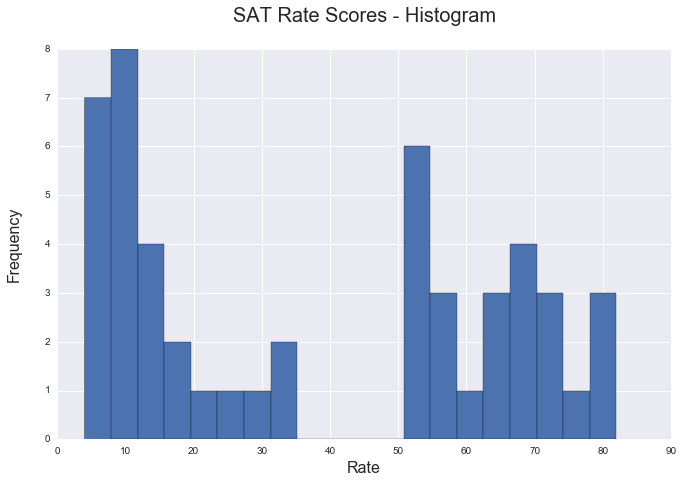

In [11]:
fig = plt.figure(figsize=(11,7))
rate.sort
plt.hist(rate, bins =20)
plt.title('SAT Rate Scores - Histogram\n', fontsize = 20)
plt.ylabel('Frequency\n', fontsize = 16)
plt.xlabel("Rate\n", fontsize = 16)
plt.show()


##### 15. Plot the Math distribution

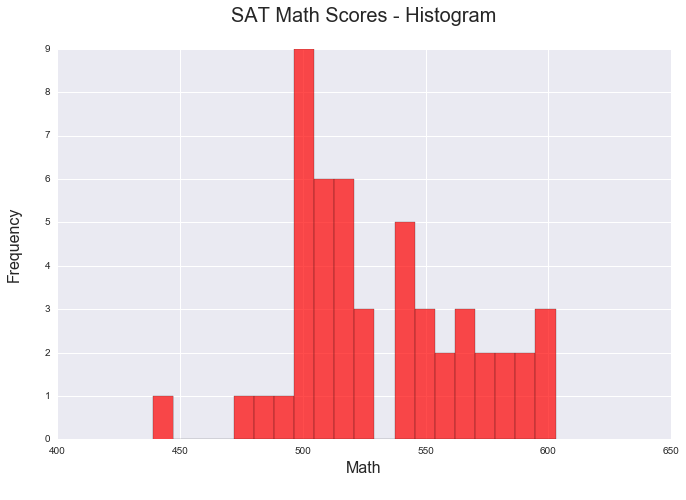

In [12]:
fig = plt.figure(figsize=(11,7))
math.sort
plt.hist(math, bins =20, alpha=0.7, color ='r')
plt.title('SAT Math Scores - Histogram\n', fontsize = 20)
plt.ylabel('Frequency\n', fontsize = 16)
plt.xlabel('Math\n', fontsize = 16)
plt.show()

## Probability density Function Graph
# d['Math'].sort()
# hmean = np.mean(d['Math'])
# print "Mean", hmean
# hstd = np.std(d['Math'])
# print hstd 
# pdf = stats.norm.pdf(d['Math'], hmean, hstd)
# print pdf
# plt.plot(d['Math'], pdf)

##### 16. Plot the Verbal distribution

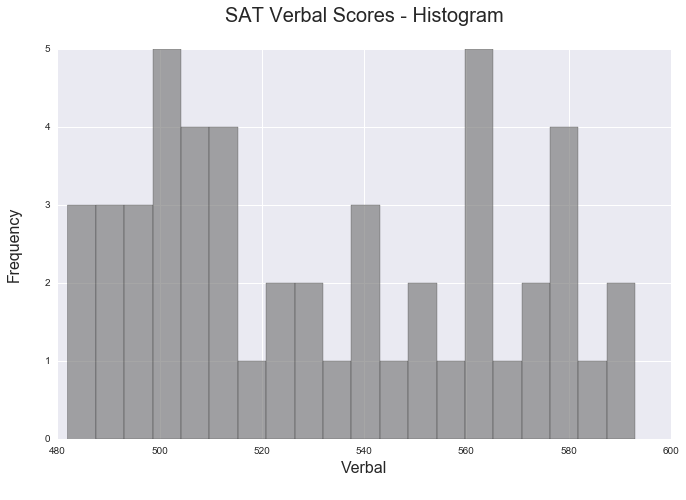

In [13]:
fig = plt.figure(figsize=(11,7))
verbal.sort
plt.hist(verbal, bins =20, alpha=0.7, color ='grey')
plt.title('SAT Verbal Scores - Histogram\n', fontsize =20)
plt.ylabel("Frequency\n", fontsize = 16)
plt.xlabel('Verbal\n', fontsize =16)
plt.show()

## Probability density Function Graph
# verbal.sort()
# hmean = np.mean(verbal)
# print "Mean", hmean
# hstd = np.std(verbal)
# print hstd
# pdf = stats.norm.pdf(verbal, hmean, hstd)
# print pdf
# plt.plot(verbal, pdf)

##### 17. What is the typical assumption for data distribution?

The data is normally distributed, or is at least symetric

##### 18. Does that distribution hold true for our data?

No

##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

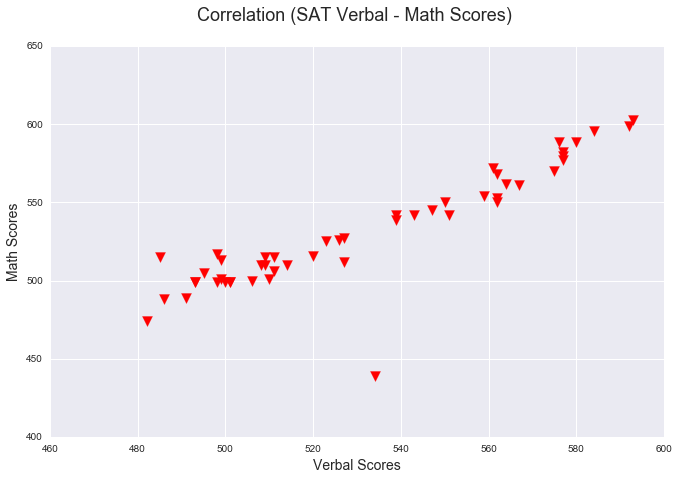

In [14]:
# edgecolors='white',alpha = 1,
fig = plt.figure(figsize=(11,7))
plt.scatter(verbal, math, color ='red', s= 100,  marker='v')
plt.title('Correlation (SAT Verbal - Math Scores) \n', fontsize=18)
plt.ylabel("Math Scores", fontsize = 14 )
plt.xlabel("Verbal Scores", fontsize = 14)
plt.show()

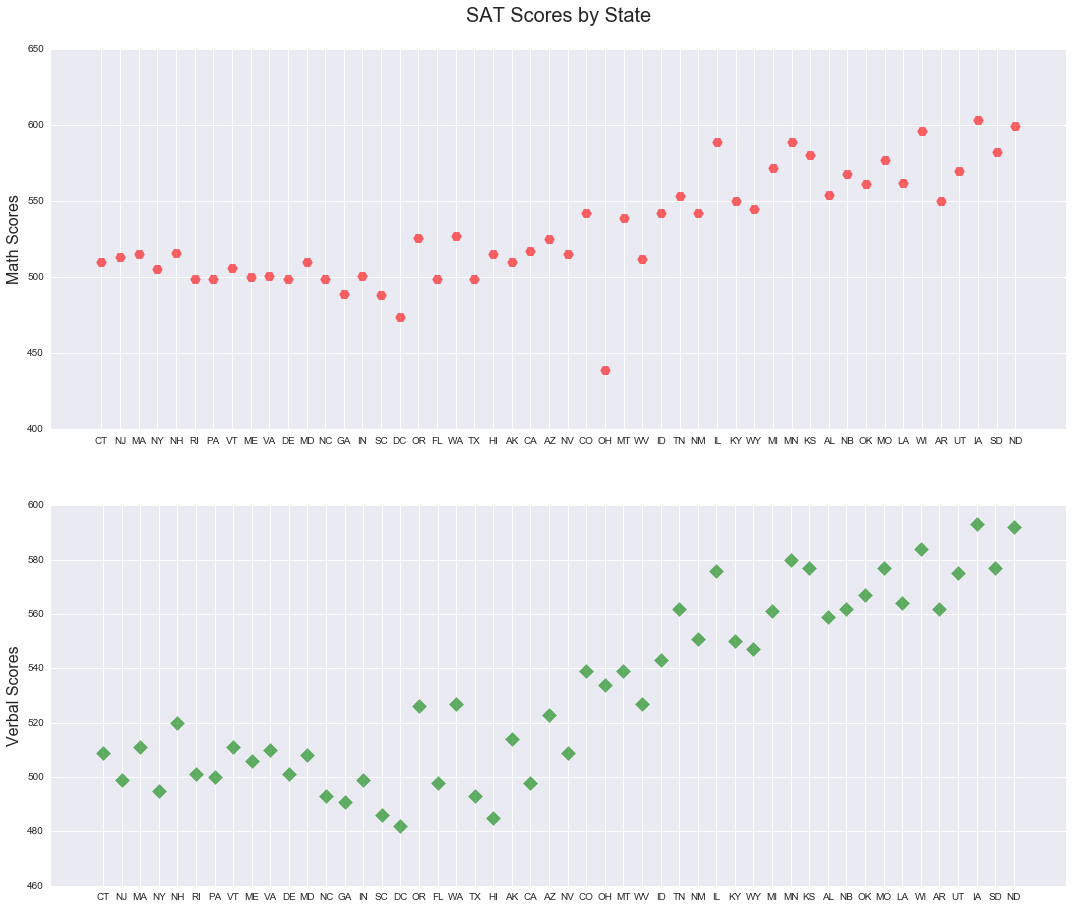

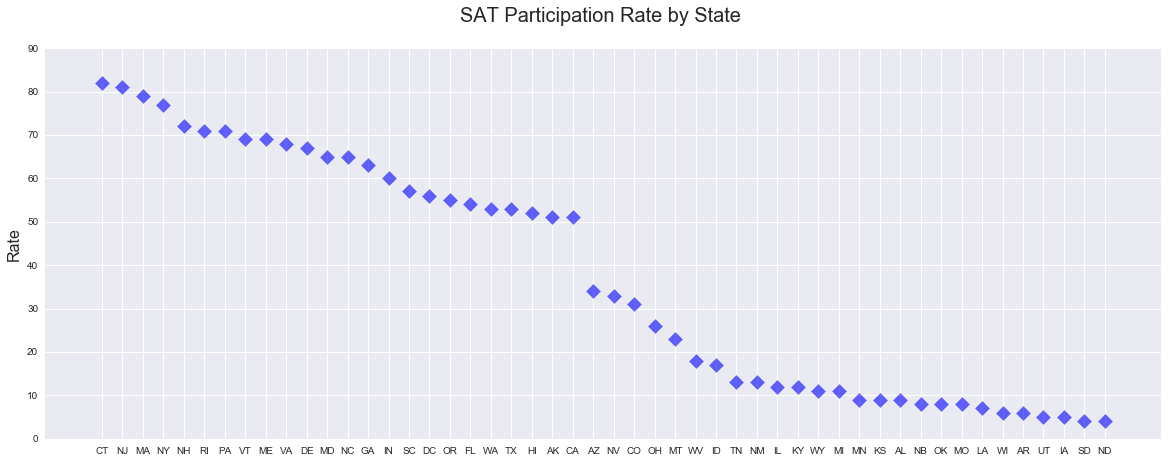

In [15]:
index_state = [i+1 for i in range(len(state_names))] ## Creating index for each state
fig = plt.figure(figsize=(40,15))

ax1 = plt.subplot(2,2,1)
my_xticks = state_names ## asing label names (state names using the state names list)
plt.xticks(index_state, my_xticks)
plt.scatter(index_state, math, marker='H', s=100, color = 'red', alpha = 0.6)
plt.title('SAT Scores by State\n', fontsize=20)
plt.ylabel("Math Scores", fontsize = 16 )
#plt.xlabel("Verbal Scores", fontsize = 14)

ax2 = plt.subplot(2,2,3)
my_xticks = state_names ## asing label names (state names using the state names list)
plt.xticks(index_state, my_xticks)
plt.scatter(index_state, verbal, marker ='D', s=100, color = 'green', alpha = 0.6)
# plt.title('SAT Verbal Scores by State) \n', fontsize=18)
plt.ylabel("Verbal Scores", fontsize = 16 )
# plt.xlabel("States", fontsize = 16)
plt.show()

fig = plt.figure(figsize=(20,7))
my_xticks = state_names ## asing label names (state names using the state names list)
plt.xticks(index_state, my_xticks)
plt.scatter(index_state, rate, marker ='D', s=100, color = 'blue', alpha = 0.6)
plt.title('SAT Participation Rate by State \n', fontsize=20)
plt.ylabel("Rate", fontsize = 16 )
# plt.xlabel("States", fontsize = 16)
plt.show()

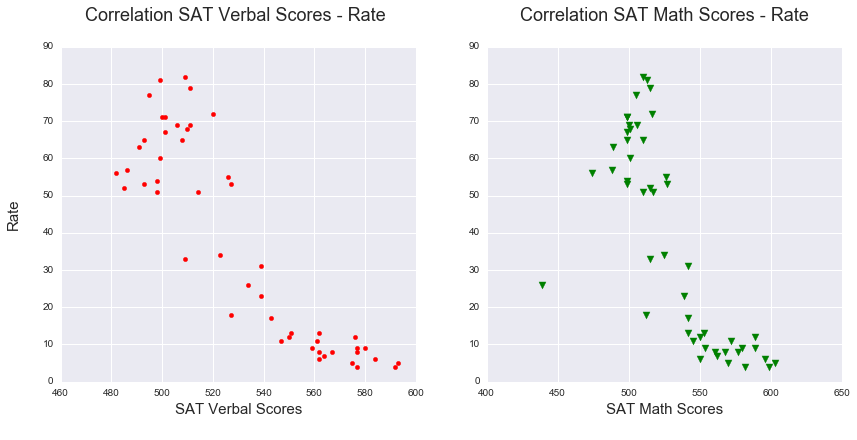

In [16]:
fig = plt.figure(figsize=(14,6))
# ## STATES and Verbal Scores
# ax1 = plt.subplot(221)
# plt.plot(index_state, verbal)

# ## STATES and Math Scores
# ax2 = plt.subplot(222)
# plt.scatter(index_state, math)

## Verbal and Rates
ax1 = plt.subplot(1,2,1)
plt.scatter(verbal, rate, color ='red')
plt.title('Correlation SAT Verbal Scores - Rate \n', fontsize =18)
plt.ylabel("Rate\n", fontsize = 15)
plt.xlabel("SAT Verbal Scores\n", fontsize = 15)


## Math and Rates
ax2 = plt.subplot(1,2,2)
plt.scatter(math,rate, marker='v', color='green', s= 50)
plt.title('Correlation SAT Math Scores - Rate\n', fontsize =18)
plt.xlabel("SAT Math Scores\n", fontsize = 15)


plt.show()


In [17]:
new_data = pd.read_csv('../assets/sat_scores.csv')
new_data.columns = ['State', 'Rate', 'Verbal', 'Math']
new_data.head(n=5)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


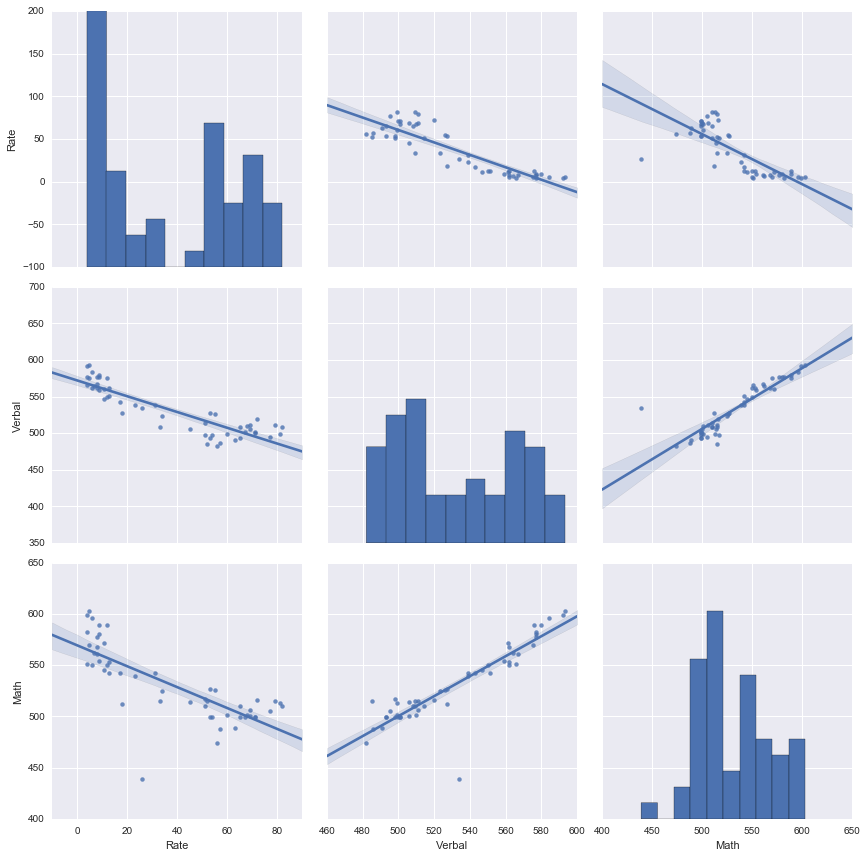

In [18]:
#sns.pairplot(new_data, size=4, hue='State', plot_kws={'s': 75})
sns.pairplot(new_data,size=4, kind="reg")

##### 20. Are there any interesting relationships to note?

1. There is a positive correlation between the verbal and math SAT scores.
2. The correlation is negative between the participation rate and the math and verbal scores.
3. The math, verbal and participation rate data does not present a symmetric distribution.
4. North and South Dakota have the highest SAT Verbal and Math Scores but have the lowest participation rates.
5. On the contrary, the data shows that the east coast states have a greater SAT participation rate. 
6. Math scores in between the 510 and 530 present the highest SAT participation rates (between 75 and 85 percent). This math score range coincides with the math scores of the majority of the east coast states.
7. Verbal scores between 490 and 510 have the highest participation rates  (between 75 to 85 percent). This verbal score range coincides with the verbal scores of the majority of the east coast states.


##### 21. Create box plots for each variable. 

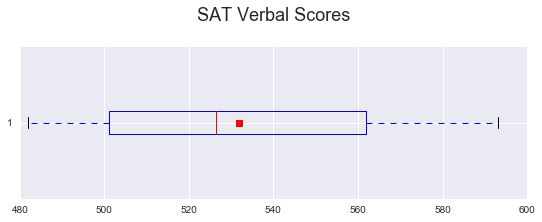

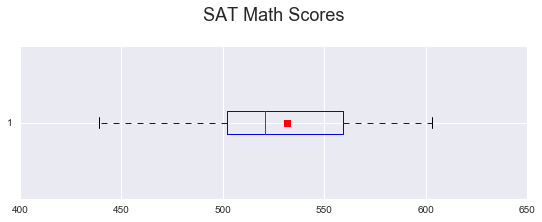

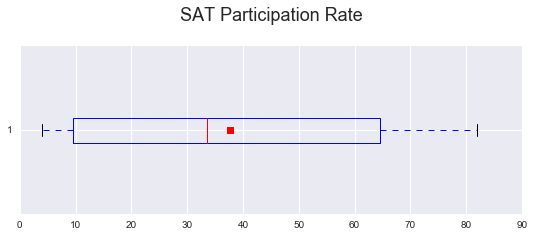

In [19]:
fig = plt.figure(figsize=(20,6))

ax1 = plt.subplot(2,2,1)
plt.boxplot(verbal, 0, 'rs', 0, 0.75, showmeans=True)
plt.title('SAT Verbal Scores\n', fontsize = 18)

fig = plt.figure(figsize=(20,6))
ax2 = plt.subplot(2,2,3)
plt.boxplot(math, 0, 'rs', 0, 1.5, showmeans=True)
plt.title('SAT Math Scores\n', fontsize = 18)

fig = plt.figure(figsize=(9,3))
plt.boxplot(rate, 0, 'rs', 0, 1.5, showmeans=True)
plt.title('SAT Participation Rate\n', fontsize = 18)
plt.show()

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

## SAT Math Scores 


![](http://snag.gy/Pqkkb.jpg)

### SAT Verbal Scores


![](http://snag.gy/xOcEm.jpg)

### SAT Participation Rates

![](http://snag.gy/6udFn.jpg)